##Third Iteration

### **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


###Analyzing mnist dataset 
To proceed further with the convoution, it is always necessary to have a better understanding of how the dataset looks and what could be the prediction dataset.

(60000, 28, 28)


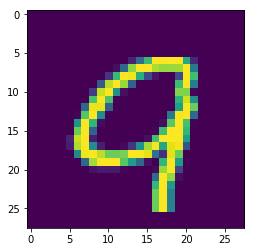

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
plt.imshow(X_train[15])
plt.imshow(X_train[500])
plt.imshow(X_train[3000])

###Data Pre-Processing

Now we need to reshape the images as the model expects. The last number 1 signifies that the image is in greyscale.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

We also need to analyzing the Class array and 'one-hot-encode' them to so that our model could make more sense out of it. 

We can see the sample of class array below:

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

after processing, we can see that the value of 5 is replaced by an array which signifies its value by keeping 1 in the 6th place (array starts by index 0) and rest of the array as 0.

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

###Building the Model


###UPDATE from Second Iteration:
I have made 2 updates to the Second iteration:
- Added Dropouts to all convolution layers to address the overfitting issue.
- Reduced number of channels of "layer 6" to 10 to reduce the number of parameters.

In [0]:
from keras.layers import Activation, BatchNormalization
model = Sequential()

#layer 1
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Dropout(0.1))

#layer 2
model.add(Convolution2D(16, 3, 3, activation='relu')) 
model.add(BatchNormalization())
model.add(Dropout(0.1))

#layer 3
model.add(Convolution2D(32, 3, 3, activation='relu')) 
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) 

#layer 4
model.add(Convolution2D(16, 1, 1, activation='relu')) 
model.add(BatchNormalization())
model.add(Dropout(0.1))

#layer 5
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#layer 6
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

#layer 7
model.add(Convolution2D(10, 1, activation='relu'))

#layer 8
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`


In [0]:
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1168      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 32)        4640      
__________

###Compiling the model


In [0]:
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

###Training the model

### \*Observation while comparing Second and Third code:
As we added drop-outs, the overfitting issue has been eliminated. We can clearly see that the Training and Validation accuracy gap is reduced drastically now.

As a result the accuracy has also increased and we were able to reach 99.40% accuracy a couple of times.

I also tried with 128 batch size, but the model seems to ber performing better at 64.

In [0]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=50, verbose=1, validation_data=(X_test,Y_test))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 17s 287us/step - loss: 0.2653 - acc: 0.9159 - val_loss: 0.0758 - val_acc: 0.9757
Epoch 2/50
60000/60000 [==============================] - 13s 217us/step - loss: 0.0727 - acc: 0.9772 - val_loss: 0.0468 - val_acc: 0.9845
Epoch 3/50
60000/60000 [==============================] - 12s 196us/step - loss: 0.0577 - acc: 0.9823 - val_loss: 0.0362 - val_acc: 0.9883
Epoch 4/50
60000/60000 [==============================] - 12s 195us/step - loss: 0.0504 - acc: 0.9842 - val_loss: 0.0428 - val_acc: 0.9863
Epoch 5/50
60000/60000 [==============================] - 12s 195us/step - loss: 0.0435 - acc: 0.9863 - val_loss: 0.0342 - val_acc: 0.9899
Epoch 6/50
60000/60000 [==============================] - 12s 196us/step - loss: 0.0400 - acc: 0.9873 - val_loss: 0.0352 - val_acc: 0.9891
Epoch 7/50
60000/60000 [==============================] - 13s 210us/step - loss: 0.0379 - acc: 0.9883 - val_loss: 0.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.02455681711617799, 0.9935]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[9.58767499e-16 3.55346416e-12 2.95469693e-09 1.48231916e-08
  2.53933913e-15 3.25578898e-16 4.84639340e-24 1.00000000e+00
  2.62300629e-15 7.23654053e-11]
 [3.40151161e-08 2.75494330e-08 9.99999881e-01 2.83804257e-13
  2.22134498e-11 2.23772954e-15 3.27989524e-10 1.38170843e-14
  3.61899427e-10 5.19124233e-14]
 [7.45526141e-11 9.99999285e-01 2.09994036e-10 2.73984696e-10
  3.40499696e-07 9.49365830e-09 5.81002491e-09 3.96986536e-07
  1.38244394e-09 2.36769160e-10]
 [9.99995708e-01 4.20373399e-16 6.25397845e-10 6.94586264e-11
  7.57645493e-14 1.19458399e-09 3.65761184e-06 8.73591310e-10
  3.17945847e-08 5.53750851e-07]
 [2.70073091e-12 2.00295730e-14 2.76903088e-12 9.76719727e-16
  9.99988794e-01 3.09058267e-14 7.86868834e-11 4.77836624e-11
  1.71104619e-09 1.11740401e-05]
 [1.61509933e-12 9.99994278e-01 1.16556792e-10 3.88224405e-14
  1.85120882e-06 2.33065889e-12 1.99771744e-11 3.83588895e-06
  5.17775302e-11 3.07900899e-10]
 [1.50485722e-20 1.10198213e-11 1.16924817e-10 4.21172395e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored